This notebook analyzes synthetic healthcare claims data from Kaggle. We'll start by loading the data, checking for issues like missing values, and exploring key fields including diagnoses (ICD codes) and costs.

In [1]:
import pandas as pd

## Load and Prepare Data

In [2]:
df = pd.read_csv('claim_data.csv')

if 'Date of Service' in df.columns:
    df['Date of Service'] = pd.to_datetime(df['Date of Service'])

print(df.shape)
print(df.head(10))

(1000, 15)
     Claim ID  Provider ID  Patient ID Date of Service  Billed Amount  \
0  0HO1FSN4AP    126528997  7936697103      2024-08-07            304   
1  9U86CI2P5A   6986719948  1547160031      2024-06-21            348   
2  1QEU1AIDAU   1355108115  2611585318      2024-07-04            235   
3  WH7XDS8CEO   9991055906  7167948632      2024-05-26            112   
4  M6OJEZ8KGI   7382167012  2140226267      2024-07-16            406   
5  NST1AJ3BG4   2460400334  5437847378      2024-06-04            272   
6  G7C9QQKWHN   4996652383  1558663046      2024-07-28            358   
7  GTGZLOTL2C   7437563222  5362322108      2024-05-30            365   
8  TLU7MTJ63J   6675789567  1861061750      2024-07-16            126   
9  44K5PG8X8S   7933652528  2435590086      2024-05-02            342   

   Procedure Code Diagnosis Code  Allowed Amount  Paid Amount Insurance Type  \
0           99231          A02.1             218          203       Self-Pay   
1           99213        

## Explore Data

In [3]:
print("Data Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

df = df.dropna()

print("\nBasic Statistics:")
print(df.describe())

if 'ICD-10 Code' in df.columns:
    print("\nTop 5 ICD-10 Codes:")
    print(df['ICD-10 Code'].value_counts().head(5))

Data Types:
Claim ID                      object
Provider ID                    int64
Patient ID                     int64
Date of Service       datetime64[ns]
Billed Amount                  int64
Procedure Code                 int64
Diagnosis Code                object
Allowed Amount                 int64
Paid Amount                    int64
Insurance Type                object
Claim Status                  object
Reason Code                   object
Follow-up Required            object
AR Status                     object
Outcome                       object
dtype: object

Missing Values:
Claim ID              0
Provider ID           0
Patient ID            0
Date of Service       0
Billed Amount         0
Procedure Code        0
Diagnosis Code        0
Allowed Amount        0
Paid Amount           0
Insurance Type        0
Claim Status          0
Reason Code           0
Follow-up Required    0
AR Status             0
Outcome               0
dtype: int64

Basic Statistics:
        Pr

## Summary

We have successfully loaded and explored the synthetic healthcare claims dataset. Key findings:
- Dataset shape and structure verified
- Date of Service converted to datetime format
- Checked for missing values and cleaned data
- Examined basic statistics and top diagnoses (ICD-10 codes)
- Ready for deeper analysis

# Day 2: Data Cleaning and Analysis

## Overview

In this section, we clean the data to handle issues like outliers, then analyze for insights like top costs by diagnosis and monthly trends. This builds on Day 1 exploration and teaches aggregation techniques useful in healthcare for spotting cost drivers.

## Step 1: Data Cleaning

Why: Real claims data often has extreme values (outliers) from errors or rare cases. We cap them to avoid skewing analysis. Also, add a 'month' column for time-based trends, as healthcare costs can vary seasonally.

In [4]:
import numpy as np

# Handle outliers in 'Billed Amount' by capping at 99th percentile
if 'Billed Amount' in df.columns:
    percentile_99 = df['Billed Amount'].quantile(0.99)
    df['Billed Amount'] = np.clip(df['Billed Amount'], 0, percentile_99)

# Add month column for time-based trends
if 'Date of Service' in df.columns:
    df['month'] = df['Date of Service'].dt.to_period('M')

print("Data cleaned: Outliers capped, month added.")

Data cleaned: Outliers capped, month added.


## Interpretation of Cleaning

After running, check the print – if outliers were high, this prevents them from dominating summaries. In healthcare, this ensures fair cost averages.

## Step 2: Core Analysis

Why: Group data to compute metrics like count, total, and average costs per diagnosis. This reveals top expense areas (e.g., chronic conditions like diabetes). Monthly sums show trends, useful for forecasting in insurance.

In [5]:
# Group by diagnosis for summary statistics
if 'Diagnosis Code' in df.columns and 'Billed Amount' in df.columns:
    diag_summary = df.groupby('Diagnosis Code')['Billed Amount'].agg(['count', 'sum', 'mean']).sort_values('sum', ascending=False)
    print("Top 5 Diagnoses by Total Cost:")
    print(diag_summary.head(5))

# Monthly trends
if 'month' in df.columns and 'Billed Amount' in df.columns:
    monthly_claims = df.groupby('month')['Billed Amount'].sum()
    print("\nMonthly Cost Trends:")
    print(monthly_claims)

Top 5 Diagnoses by Total Cost:
                count   sum        mean
Diagnosis Code                         
A05.4              19  5872  309.052632
A06.8              17  5294  311.411765
A16.1              17  5258  309.294118
A02.1              15  5256  350.400000
A17.8              15  4951  330.066667

Monthly Cost Trends:
month
2024-05    63295
2024-06    69641
2024-07    67369
2024-08    59597
2024-09    37270
Freq: M, Name: Billed Amount, dtype: int64


## Interpretation of Analysis

Look at top diagnoses: High 'sum' means that code (e.g., ICD for heart disease) drives costs – in real world, target prevention. Monthly trends might show peaks (e.g., flu season).

## Step 3: Visualization

Why: Plots make insights visual and easy to share. Bar for top items, line for time series – great for presentations.

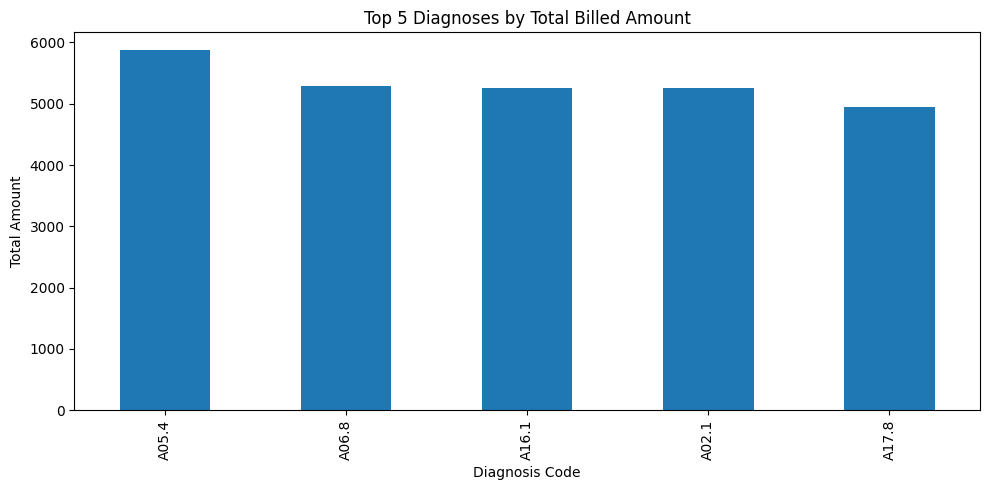

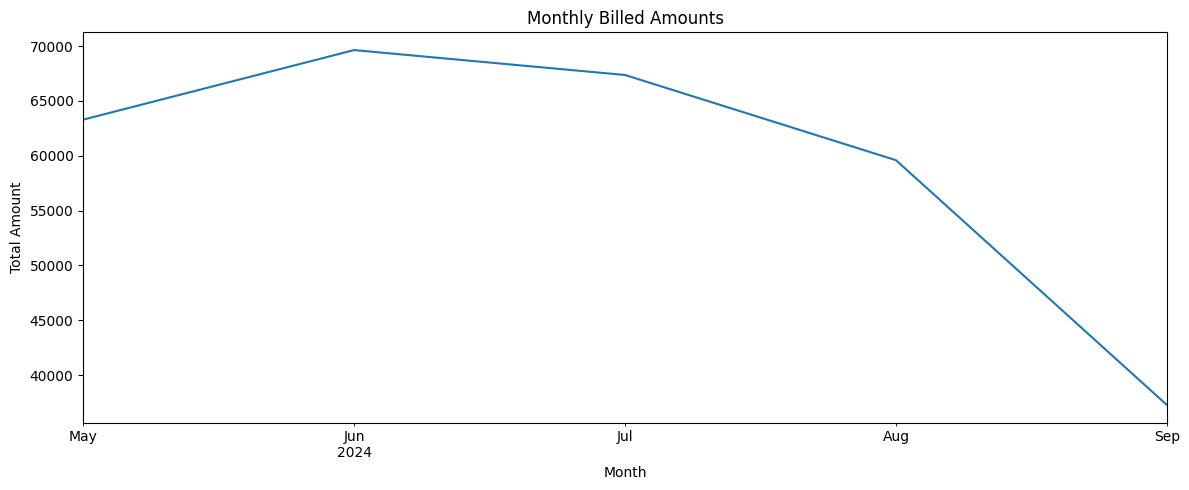

In [6]:
import matplotlib.pyplot as plt

# Bar plot for top diagnoses
if 'diag_summary' in locals():
    diag_summary['sum'].head(5).plot(kind='bar', figsize=(10, 5))
    plt.title('Top 5 Diagnoses by Total Billed Amount')
    plt.ylabel('Total Amount')
    plt.xlabel('Diagnosis Code')
    plt.tight_layout()
    plt.show()

# Line plot for monthly trends
if 'monthly_claims' in locals():
    monthly_claims.plot(kind='line', figsize=(12, 5))
    plt.title('Monthly Billed Amounts')
    plt.ylabel('Total Amount')
    plt.xlabel('Month')
    plt.tight_layout()
    plt.show()

## Interpretation of Visuals

The bar plot highlights costliest diagnoses – discuss in demos how this informs policy. Line plot shows fluctuations; in healthcare, dips might indicate data gaps or seasonal variations in claim submissions.